In [134]:

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Data Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Additional libraries for similar functionality
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.weightstats import DescrStatsW


In [135]:
data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


#### Column:
+ Employee_ID: Unique identifier for each employee.
+ Age: Age of the employee.
+ Gender: Gender of the employee.
+ Job_Role: Current role of the employee.
+ Industry: Industry they work in.
+ Work_Location: Whether they work remotely, hybrid, or onsite.
+ Stress_Level: Their self-reported level of stress.
+ Mental_Health_Condition: Any mental health condition reported (Anxiety, Depression, etc.).
+ Social_Isolation_Rating: A self-reported rating (1-5) on how isolated they feel.
+ Satisfaction_with_Remote_Work: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).

### EDA

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [137]:
data.shape

(5000, 20)

In [138]:
data.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

#### From this quick over view we can see we are missing data in columns (Mental Health and Physical Activity) our guess this infromation was withheld for privacy concerns

In [139]:
gender_numbers = data.groupby('Gender')['Employee_ID'].size()
percentage_gender = pd.DataFrame(gender_numbers / data['Employee_ID'].count() * 100).reset_index()
percentage_gender

,Gender,Employee_ID
0,Female,25.48
1,Male,25.40
2,Non-binary,24.28
3,Prefer not to say,24.84


C:\Users\Khaled\AppData\Local\Temp\ipykernel_9436\3295880757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



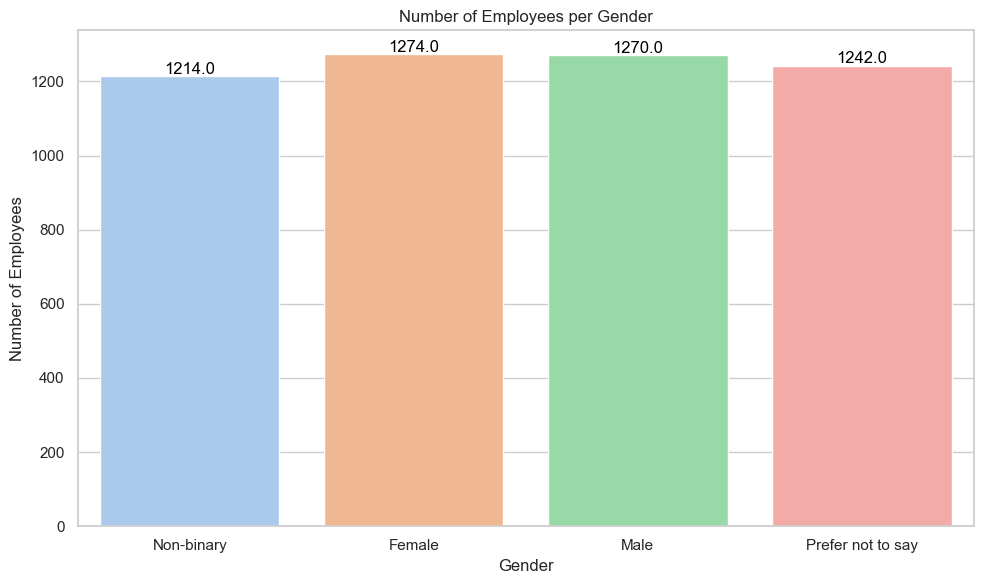

In [140]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
ax_number_per_gender = sns.countplot(data=data, x='Gender', palette='pastel')

# Annotate each bar with the count
for p in ax.patches:
    ax_number_per_gender.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Number of Employees per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')

# Show plot
plt.tight_layout()
plt.show()

#### From this split we notice that the genders are also almost split perfectly between the for categories

In [141]:
number_per_work_location = data.groupby('Work_Location')['Employee_ID'].count()
number_per_work_location_df = pd.DataFrame(number_per_work_location).reset_index()
number_per_work_location_df.columns =  ['Work Location', 'Number']
number_per_work_location_df

,Work Location,Number
0,Hybrid,1649
1,Onsite,1637
2,Remote,1714


C:\Users\Khaled\AppData\Local\Temp\ipykernel_9436\4043404511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



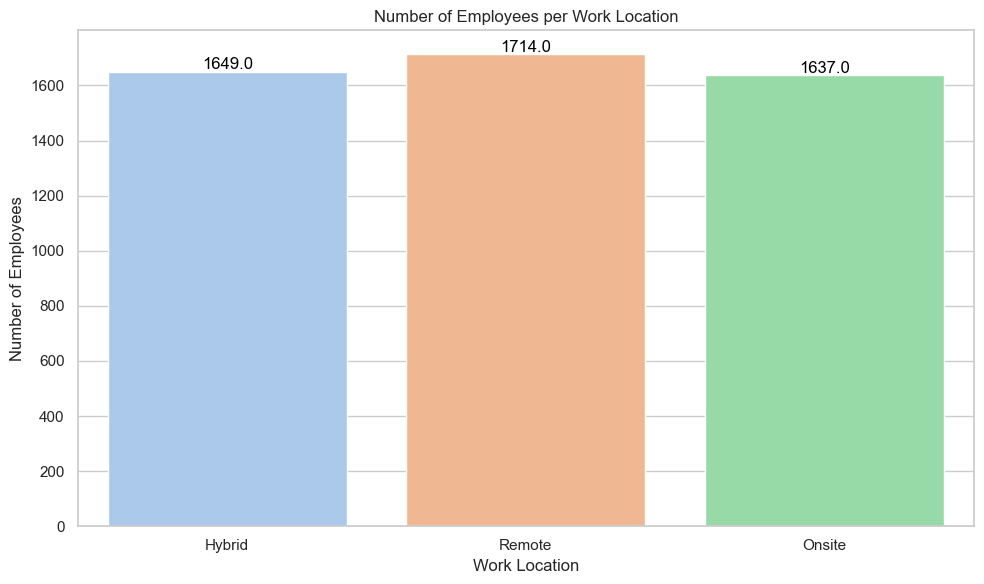

In [142]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
ax_number_per_work_location = sns.countplot(data=data, x='Work_Location', palette='pastel')

# Annotate each bar with the count
for p in ax_number_per_work_location.patches:
    ax_number_per_work_location.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Number of Employees per Work Location')
plt.xlabel('Work Location')
plt.ylabel('Number of Employees')

# Show plot
plt.tight_layout()
plt.show()

In [143]:
percent_per_work_location = number_per_work_location / (data['Employee_ID'].count()) * 100
percent_per_work_location_df = pd.DataFrame(percent_per_work_location).reset_index()
percent_per_work_location_df.columns = ['Work Location', 'Percentage']
percent_per_work_location_df['Percentage'] = percent_per_work_location_df['Percentage'].apply(lambda x: f'{x:.1f}%')
percent_per_work_location_df

,Work Location,Percentage
0,Hybrid,33.0%
1,Onsite,32.7%
2,Remote,34.3%


From these numbers we can notice our dataset is split amlost in thirds, which will helps us getting a good understanding for each scenario

Now let's see the percentage per region

In [144]:
work_location_per_region = data.groupby(['Region','Work_Location']).size().unstack(fill_value = 0) 
# .size() method counts the number of occurrences in each group
# The fill_value=0 ensures that any missing combinations (e.g., if no employees in a region work Onsite) are filled with 0 instead of NaN.
work_location_per_region

Work_Location,Hybrid,Onsite,Remote
Region,,,
Africa,290,266,304
Asia,268,265,296
Europe,281,276,283
North America,261,252,264
Oceania,284,293,290
South America,265,285,277


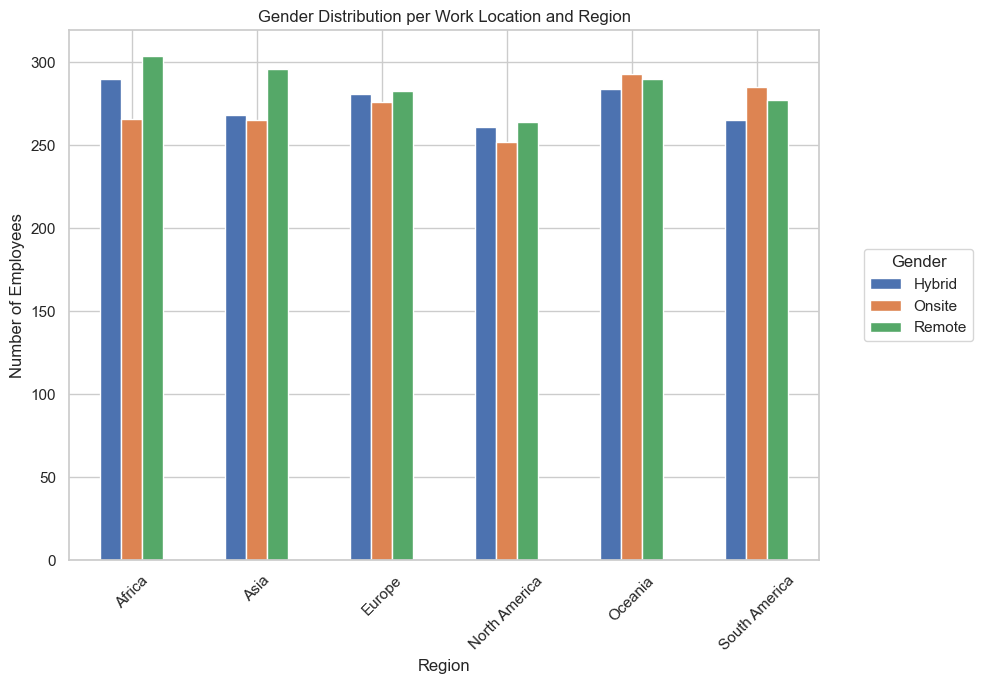

In [145]:
sns.set(style="whitegrid")

# Create a bar plot
work_location_per_region.plot(kind='bar', figsize=(10, 7))

# Add titles and labels
plt.title('Gender Distribution per Work Location and Region')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender',bbox_to_anchor=(1.05, 0.5), loc='center left')

# Show the plot
plt.tight_layout()
plt.show()

In [146]:
percent_work_location_per_region = work_location_per_region.div(work_location_per_region.sum(axis=1), axis=(0)) * 100 

# Calculates the total number of employees in each region by summing across the rows (axis=1 refers to row-wise operations)
# Divides each work location count by the total number of employees in that region. The axis=0 ensures the division happens row-wise (for each region)

percent_work_location_per_region.round(2)

Work_Location,Hybrid,Onsite,Remote
Region,,,
Africa,33.72,30.93,35.35
Asia,32.33,31.97,35.71
Europe,33.45,32.86,33.69
North America,33.59,32.43,33.98
Oceania,32.76,33.79,33.45
South America,32.04,34.46,33.49


# Key Observations:

#### 1- Balanced Distribution Across Regions:

All three work location types (Hybrid, Onsite, Remote) are relatively balanced in each region.
Percentages range from ~30% to ~35%, indicating that no single work mode dominates significantly within any region.

#### 2- Region-Specific Trends:

+ Africa: Remote work is slightly more popular (35.35%), while Onsite work is less common (30.93%).
+ Asia: Similar to Africa, Remote work leads (35.71%), but Hybrid and Onsite are nearly equal (~32-33%).
+ Europe: The distribution is particularly balanced, with Remote (33.69%), Onsite (32.86%), and Hybrid (33.45%) being very close.
+ North America: Remote work is slightly ahead (33.98%), followed closely by Hybrid (33.59%) and Onsite (32.43%).
+ Oceania: Onsite work has the highest share (33.79%), with Hybrid and Remote being nearly identical (~33% each).
+ South America: Onsite work stands out at 34.46%, the highest among all regions, while Hybrid (32.04%) is slightly lower.

#### General Conclusion:

+ Remote work is consistently well-represented across regions, often the highest or close to the highest.
+ Hybrid work is also common, indicating flexibility in work arrangements globally.
+ Onsite work varies slightly more, with South America and Oceania favoring it a bit more.
These trends could reflect factors like infrastructure, workplace culture, and technological readiness in each region. Let me know if you'd like further analysis!

In [147]:
work_location_per_gender = data.groupby(['Gender', 'Work_Location']).size().unstack(fill_value = 0)
percentage_work_location_per_gender = work_location_per_gender.div(work_location_per_gender.sum(axis=1), axis=0) * 100
percentage_work_location_per_gender.round(2)
work_location_per_gender, percentage_work_location_per_gender.round(2)

(Work_Location      Hybrid  Onsite  Remote
 Gender                                   
 Female                441     380     453
 Male                  387     452     431
 Non-binary            413     400     401
 Prefer not to say     408     405     429,
 Work_Location      Hybrid  Onsite  Remote
 Gender                                   
 Female              34.62   29.83   35.56
 Male                30.47   35.59   33.94
 Non-binary          34.02   32.95   33.03
 Prefer not to say   32.85   32.61   34.54)

C:\Users\Khaled\AppData\Local\Temp\ipykernel_9436\3295880757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



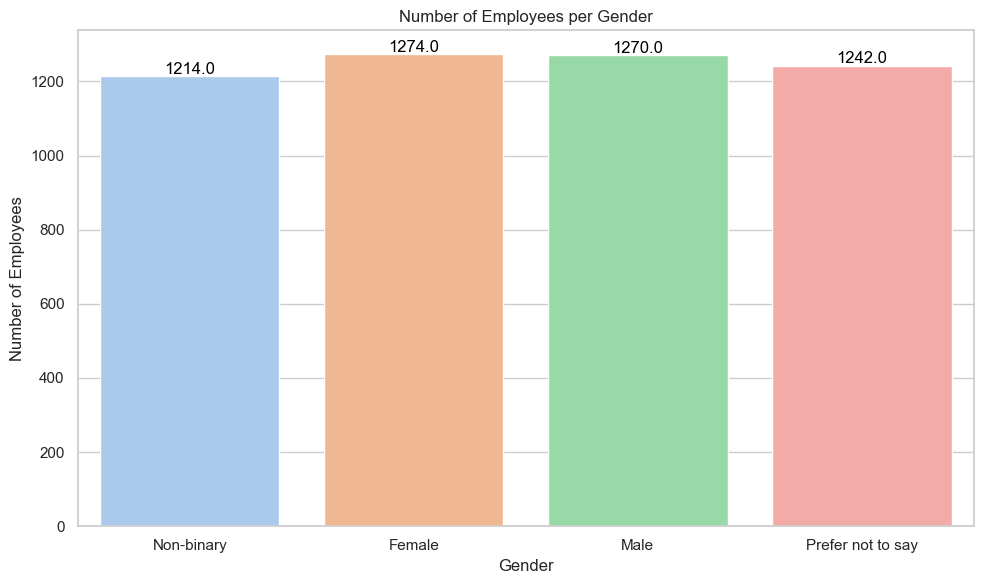

In [148]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
ax_number_per_gender = sns.countplot(data=data, x='Gender', palette='pastel')

# Annotate each bar with the count
for p in ax.patches:
    ax_number_per_gender.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Number of Employees per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')

# Show plot
plt.tight_layout()
plt.show()

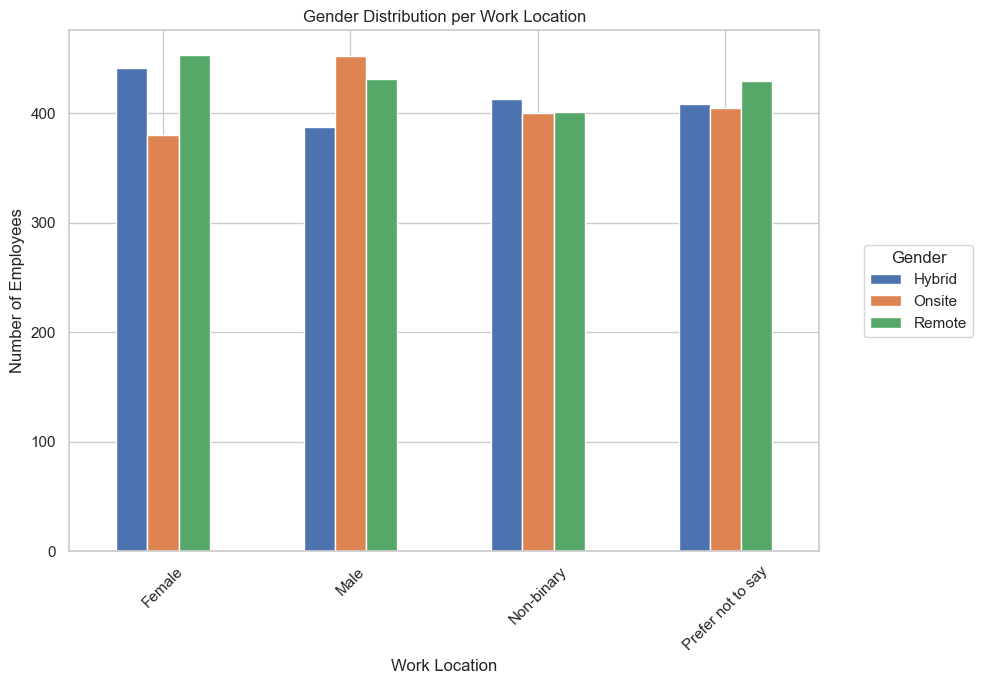

In [149]:
import matplotlib.pyplot as plt

# Create a grouped bar plot
work_location_per_gender.plot(kind='bar', figsize=(10, 7))

# Add titles and labels
plt.title('Gender Distribution per Work Location')
plt.xlabel('Work Location')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)

# Adjust the legend position to the side
plt.legend(title='Gender', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Show the plot
plt.tight_layout()
plt.show()

In [150]:
# # Create a contingency table
# contingency_table = pd.crosstab(data['Work_Location'], data['Gender'])

# # Perform chi-square test
# chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# # Print results
# print(f"Chi-square statistic: {chi2:.3f}")
# print(f"p-value: {p_value:.3f}")
# print(f"Degrees of freedom: {dof}")

# # Create a heatmap of the contingency table
# plt.figure(figsize=(10, 6))
# sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
# plt.title('Work Location vs Gender')
# plt.tight_layout()
# plt.show()

# # Calculate percentages
# percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# # Create a stacked bar plot
# percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Work Location vs Gender (%)')
# plt.xlabel('Work Location')
# plt.ylabel('Percentage')
# plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

## Chi-Square Test Results

| Statistic | Value |
|-----------|-------|
| Chi-square statistic | 11.562 |
| p-value | 0.072 |
| Degrees of freedom | 6 |

## Interpretation

The chi-square test yielded a p-value of 0.072, which is greater than the conventional significance level of 0.05. This result suggests that there is no statistically significant relationship between work location and gender.

## What This Means

1. **No Strong Evidence of Association**: The test results indicate that the distribution of genders across different work locations (Remote, Hybrid, and Onsite) is not significantly different from what we would expect by chance.

2. **Work Location Independence**: This suggests that an employee's gender does not strongly influence their work location, or vice versa. The choice or assignment of work location appears to be independent of gender.

3. **Equal Opportunities**: The lack of a significant relationship could indicate that the company provides equal opportunities for different work arrangements regardless of gender.

## Important Note

While the result is not statistically significant at the 0.05 level, the p-value (0.072) is relatively close to this threshold. This suggests that there might be a weak or subtle relationship that could be worth exploring further with a larger sample size or additional data.

## Conclusion

Based on this analysis, we cannot confidently claim that there is a significant difference in work location preferences or assignments based on gender in this dataset.

## Visualizations

### Contingency Table: Work Location vs. Gender

![Contingency Table](https://ppl-ai-code-interpreter-files.s3.amazonaws.com/web/direct-files/41582065/e6f9c6fe-1529-4aff-9fa6-622a42268e3b/0/image.png)

### Percentage of Work Location by Gender

![Percentage of Work Location by Gender](https://ppl-ai-code-interpreter-files.s3.amazonaws.com/web/direct-files/41582065/e6f9c6fe-1529-4aff-9fa6-622a42268e3b/1/Percentage%20of%20Work%20Location%20by%20Gender.png)


In [ ]:
Stress_Level = data.groupby('Stress_Level').size().reset_index
Stress_Level

<bound method Series.reset_index of Stress_Level
High      1686
Low       1645
Medium    1669
dtype: int64>

In [167]:
Stress_Level_per_location = data.groupby(['Stress_Level','Work_Location']).size().unstack(fill_value = 0) 
Stress_Level_per_location = Stress_Level_per_location.rename(
    columns={0: 'Count'})
Stress_Level_per_location

Work_Location,Hybrid,Onsite,Remote
Stress_Level,,,
High,561,535,590
Low,543,555,547
Medium,545,547,577


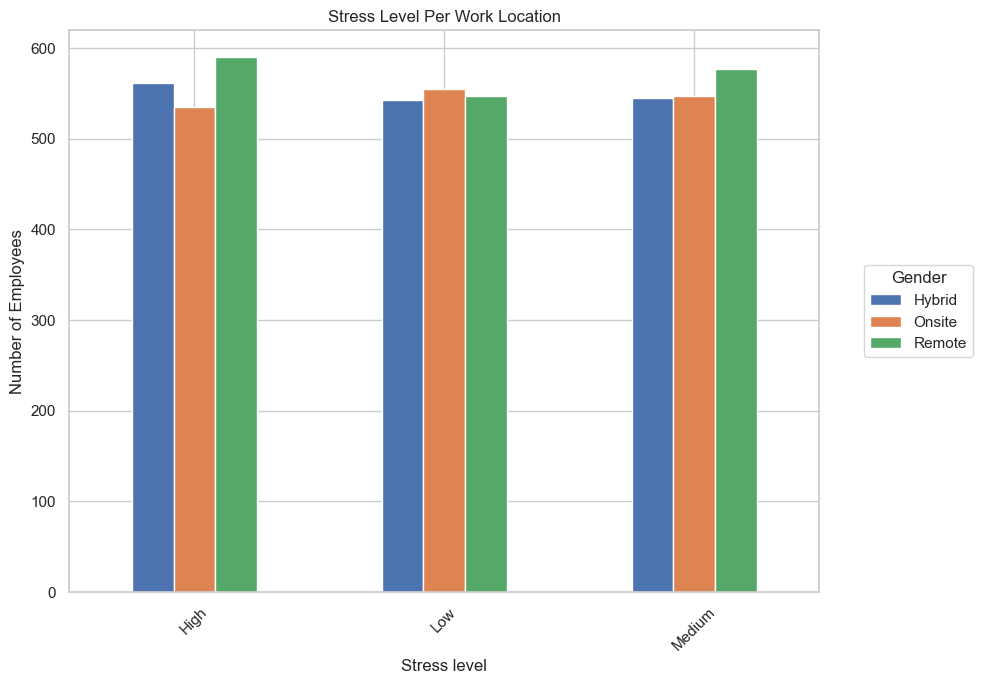

In [169]:
sns.set(style="whitegrid")

# Create a bar plot
Stress_Level_per_location.plot(kind='bar', figsize=(10, 7))

# Add titles and labels
plt.title('Stress Level Per Work Location')
plt.xlabel('Stress level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender',bbox_to_anchor=(1.05, 0.5), loc='center left')

# Show the plot
plt.tight_layout()
plt.show()

In [171]:
stress_metal_health = data.groupby(['Stress_Level', 'Mental_Health_Condition']).size().unstack()
stress_metal_health

Mental_Health_Condition,Anxiety,Burnout,Depression
Stress_Level,,,
High,438,445,401
Low,428,413,416
Medium,412,422,429


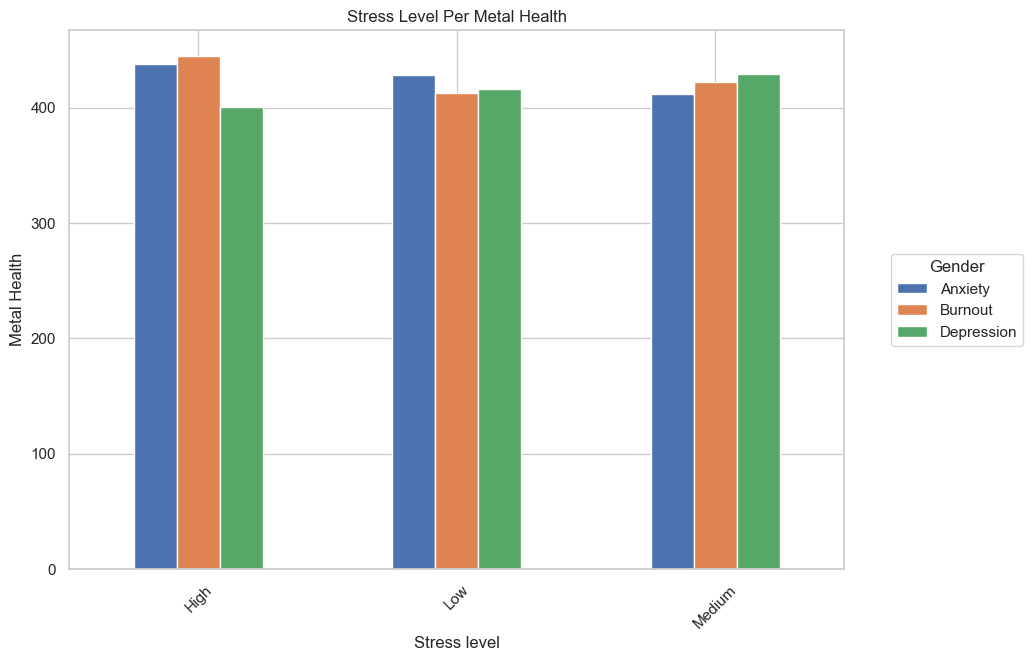

In [ ]:
stress_metal_health.plot(kind='bar',figsize=(10, 7))

plt.title('Stress Level Per Metal Health')
plt.xlabel('Stress level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Gender',bbox_to_anchor=(1.05, 0.5), loc='center left')